In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, auc, roc_curve, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

In [21]:
df = pd.read_csv('../data/creditcard.csv')

In [22]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

df = df.drop(['Time'], axis=1)

In [23]:
# 'Class' is target variable
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
print(y_train.value_counts(normalize=True))

Class
0    0.998222
1    0.001778
Name: proportion, dtype: float64


In [25]:
# initialize random forest
rf_clf = RandomForestClassifier(random_state=1)

In [26]:
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

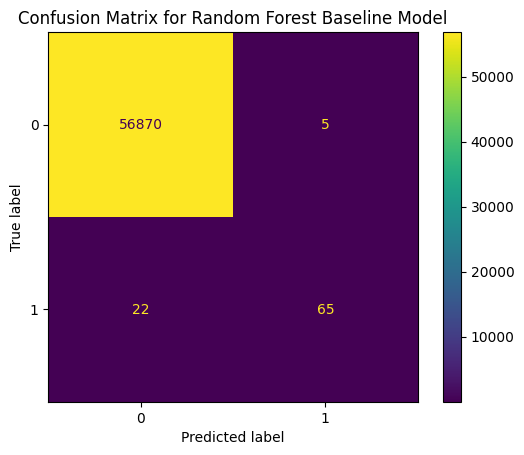

In [27]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix for Random Forest Baseline Model')
plt.show()

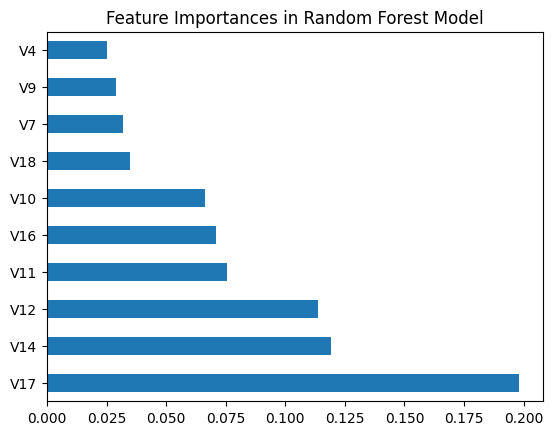

In [28]:
feature_importances_rf = pd.Series(rf_clf.feature_importances_, index=X.columns)
feature_importances_rf.nlargest(10).plot(kind='barh')
plt.title('Feature Importances in Random Forest Model')
plt.show()

In [29]:
# ROC curve 
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

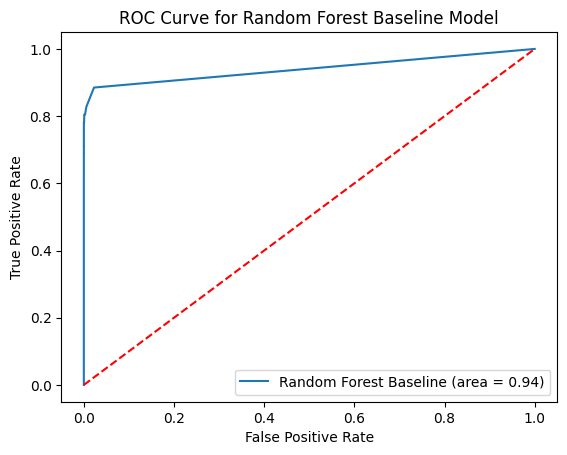

In [30]:
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Baseline (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Baseline Model')
plt.legend(loc="lower right")
plt.show()

In [31]:
# baseline evaluation
print("Random Forest - Baseline Model Performance")
print(f"Precision: {precision_score(y_test, y_pred_rf):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_rf):.2f}")

Random Forest - Baseline Model Performance
Precision: 0.93
Recall: 0.75
F1-Score: 0.83
ROC AUC: 0.94


In [36]:

param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_model = RandomForestClassifier()

random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=5,  
    cv=3,       
    verbose=10, 
    random_state=1,  
    n_jobs=-1  
)

random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [38]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Model Performance with Best Parameters")
print(f"Precision: {precision_score(y_test, y_pred_best):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_best):.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba_best):.2f}")




Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'bootstrap': False}
Best Score: 0.9995084379078194

Random Forest Model Performance with Best Parameters
Precision: 0.93
Recall: 0.77
F1-Score: 0.84
ROC AUC: 0.95


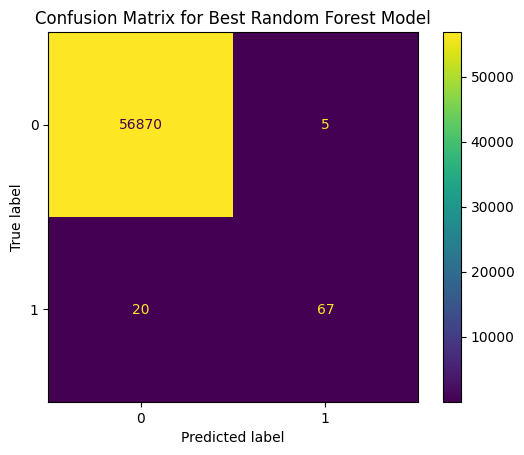

In [39]:
cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot()
plt.title('Confusion Matrix for Best Random Forest Model')
plt.show()



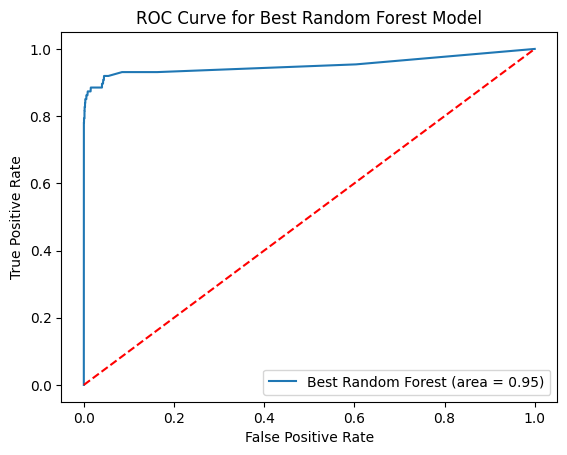

In [40]:
fpr_best, tpr_best, _ = roc_curve(y_test, y_pred_proba_best)
roc_auc_best = auc(fpr_best, tpr_best)

plt.figure()
plt.plot(fpr_best, tpr_best, label=f'Best Random Forest (area = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model')
plt.legend(loc="lower right")
plt.show()